In [1]:
import pandas as pd
import numpy as np
import requests
import json
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup


- Q1. Usando o  python  (sugerimos o  pacote  yfinance  ou  o  pandas)importe  os  dados  de  preço  de fechamento de 01/11/2017até 01/01/2022 das ações que compõem o indice IBRX 50. Preencha dados faltantes de cada série com as médias dos vizinhos. Mostre que o DataFrame resultante não temvalores vazios.

# 1.1 Getting the current stocks in IBRX 50

### - 1.1.1 From Infomoney

In [131]:
ibrx50_im_url = 'https://www.infomoney.com.br/cotacoes/b3/indice/ibrx50/'
ibrx50_im = pd.read_html(ibrx50_im_url, decimal=',', thousands='.')[2:]
ibrx50_im = pd.concat(ibrx50_im).reset_index(drop=True)
ibrx50_im

,Ativo,Último (R$),Var. Dia (%),Val. Min (R$),Val. Máx (R$),Data
0,BBAS3,38.34,0.47,37.72,39.03,17:07 30/09
1,BBDC4,19.78,0.30,19.66,20.00,17:07 30/09
2,BRAP4,22.63,4.99,22.48,23.97,17:07 30/09
3,VBBR3,16.80,2.62,16.57,17.38,17:07 30/09
4,SUZB3,43.23,2.94,42.96,44.70,17:07 30/09
5,GGBR4,23.63,3.43,23.41,24.78,17:07 30/09
6,BRKM5,26.04,0.77,25.70,26.68,17:07 30/09
7,CSNA3,12.04,5.65,11.91,12.80,17:07 30/09
8,RADL3,22.13,2.71,21.95,22.88,17:07 30/09
9,ELET3,42.47,1.18,42.16,43.35,17:07 30/09


In [133]:
# Saving only tickers
stocks_im = ibrx50_im['Ativo'].tolist()
#stocks_im

In [134]:
#ibrx50_im.to_excel('ibrx50_im.xlsx', index = False)

### Alternative source
- 1.1.2 From B3

In [8]:
# 
url = 'https://sistemaswebb3-listados.b3.com.br/indexProxy/indexCall/GetPortfolioDay/eyJpbmRleCI6IklCWEwiLCJsYW5ndWFnZSI6InB0LWJyIn0='
r = requests.get(url)
pd.json_normalize(json.loads(r.content))
ibrx50_b3 =  pd.json_normalize(json.loads(r.content), record_path =['results'])
ibrx50_b3.drop(columns=['segment', 'partAcum'], inplace=True) # Not really necessary
ibrx50_b3['part'] = ibrx50_b3['part'].apply(lambda x: float(x.replace(',', '.'))/100) # Also not necessary in this case
ibrx50_b3['theoricalQty'] = ibrx50_b3['theoricalQty'].apply(lambda x: int(x.replace('.', ''))) # Same as above
ibrx50_b3


,cod,asset,type,part,theoricalQty
0,RRRP3,3R PETROLEUM,ON NM,0.00392,200453863
1,ABEV3,AMBEV S/A,ON,0.03747,4386652506
2,AMER3,AMERICANAS,ON NM,0.00556,596086291
3,ASAI3,ASSAI,ON NM,0.00768,795949801
4,AZUL4,AZUL,PN N2,0.00265,327646296
5,B3SA3,B3,ON EDJ NM,0.04233,5901731302
6,BBSE3,BBSEGURIDADE,ON NM,0.00981,671682536
7,BRML3,BR MALLS PAR,ON NM,0.00429,828273884
8,BBDC4,BRADESCO,PN N1,0.05622,5156077326
9,BRAP4,BRADESPAR,PN N1,0.00328,251025058


In [137]:
#ibrx50_b3.to_excel('ibrx50_b3.xlsx', index = False)

In [9]:
# Subsetting only tickers and adding '.SA' to match yfinance format
tickers = ibrx50_b3['cod'].tolist()
tickers = [ticker + '.SA' for ticker in tickers]
tickers


['RRRP3.SA',
 'ABEV3.SA',
 'AMER3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBSE3.SA',
 'BRML3.SA',
 'BBDC4.SA',
 'BRAP4.SA',
 'BBAS3.SA',
 'BRKM5.SA',
 'BRFS3.SA',
 'BPAC11.SA',
 'CCRO3.SA',
 'CSAN3.SA',
 'CVCB3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'EQTL3.SA',
 'GGBR4.SA',
 'NTCO3.SA',
 'HAPV3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'KLBN11.SA',
 'RENT3.SA',
 'LWSA3.SA',
 'LREN3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'CASH3.SA',
 'MULT3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PRIO3.SA',
 'PETZ3.SA',
 'RADL3.SA',
 'RDOR3.SA',
 'RAIL3.SA',
 'CSNA3.SA',
 'SUZB3.SA',
 'TOTS3.SA',
 'USIM5.SA',
 'VALE3.SA',
 'VIIA3.SA',
 'VBBR3.SA',
 'WEGE3.SA']

### - 1.2 importando  os  dados  de  preço  de fechamento de 01/11/2017até 01/01/2022

In [13]:
# Self explained, but treats the columns names - Taking the '.SA' out
def fix_col_names(df):
    return ['IBOV' if col == '^BVSP' else col.rstrip('.SA') for col in df.columns]

In [14]:
# Actually getting closing prices from yfinance
prices = yf.download(tickers, start='2017-11-01', end='2022-01-01', rounding=True)['Adj Close']
prices.columns = fix_col_names(prices) # Fixing column names
prices


[*********************100%***********************]  50 of 50 completed


,ABEV3,AMER3,ASAI3,AZUL4,B3SA3,BBAS3,BBDC4,BBSE3,BPAC11,BRAP4,...,RDOR3,RENT3,RRRP3,SUZB3,TOTS3,USIM5,VALE3,VBBR3,VIIA3,WEGE3
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-01,17.99,21.56,NaN,27.36,6.54,25.64,15.20,18.43,4.48,12.73,...,NaN,17.32,NaN,18.78,10.75,7.21,22.71,NaN,7.3138,7.58
2017-11-02,17.99,21.56,NaN,27.36,6.54,25.64,15.20,18.43,4.48,12.73,...,NaN,17.32,NaN,18.78,10.75,7.21,22.71,NaN,7.3138,7.58
2017-11-03,17.87,20.12,NaN,26.80,6.39,25.18,15.36,18.33,4.37,13.10,...,NaN,17.26,NaN,18.78,10.63,7.10,23.21,NaN,7.3636,7.68
2017-11-06,17.82,19.24,NaN,26.84,6.40,24.98,15.36,18.99,4.35,13.29,...,NaN,17.16,NaN,18.78,10.83,7.54,23.76,NaN,7.3138,7.78
2017-11-07,17.52,17.40,NaN,25.90,6.19,23.73,14.83,18.28,4.35,12.87,...,NaN,18.08,NaN,18.78,11.04,6.88,23.20,NaN,7.2043,7.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,15.55,30.12,13.98,26.46,10.99,27.71,17.14,19.15,21.02,22.72,...,42.19,53.84,31.27,58.59,28.50,14.10,72.46,20.54,4.5000,32.93
2021-12-27,15.53,31.27,13.53,25.67,10.93,27.77,17.34,19.27,21.04,23.32,...,44.23,54.13,31.77,58.74,28.57,14.27,72.28,20.81,4.8600,32.64
2021-12-28,15.52,30.42,12.99,25.75,10.78,27.61,17.28,19.31,20.30,23.18,...,45.34,52.66,32.07,58.08,28.09,13.99,70.54,20.96,4.9500,32.75


In [15]:
# MAIORES DADOS FALTANTES - Naturalmente são as ações que não haviam capital aberto em todo período
prices.isna().sum().sort_values(ascending=False)

ASAI3     823
RDOR3     776
RRRP3     755
CASH3     751
PETZ3     714
LWSA3     563
NTCO3     531
HAPV3     123
VBBR3      93
PRIO3       1
MGLU3       1
MRFG3       1
MULT3       1
PETR3       1
PETR4       1
ABEV3       1
RADL3       1
KLBN11      1
RAIL3       1
RENT3       1
SUZB3       1
TOTS3       1
USIM5       1
VALE3       1
VIIA3       1
LREN3       1
ITUB4       1
JBSS3       1
BRML3       1
AZUL4       1
B3SA3       1
BBAS3       1
BBDC4       1
BBSE3       1
BPAC11      1
BRAP4       1
BRFS3       1
BRKM5       1
CCRO3       1
AMER3       1
CSAN3       1
CSNA3       1
CVCB3       1
ELET3       1
ELET6       1
EMBR3       1
EQTL3       1
GGBR4       1
ITSA4       1
WEGE3       1
dtype: int64

<AxesSubplot:>

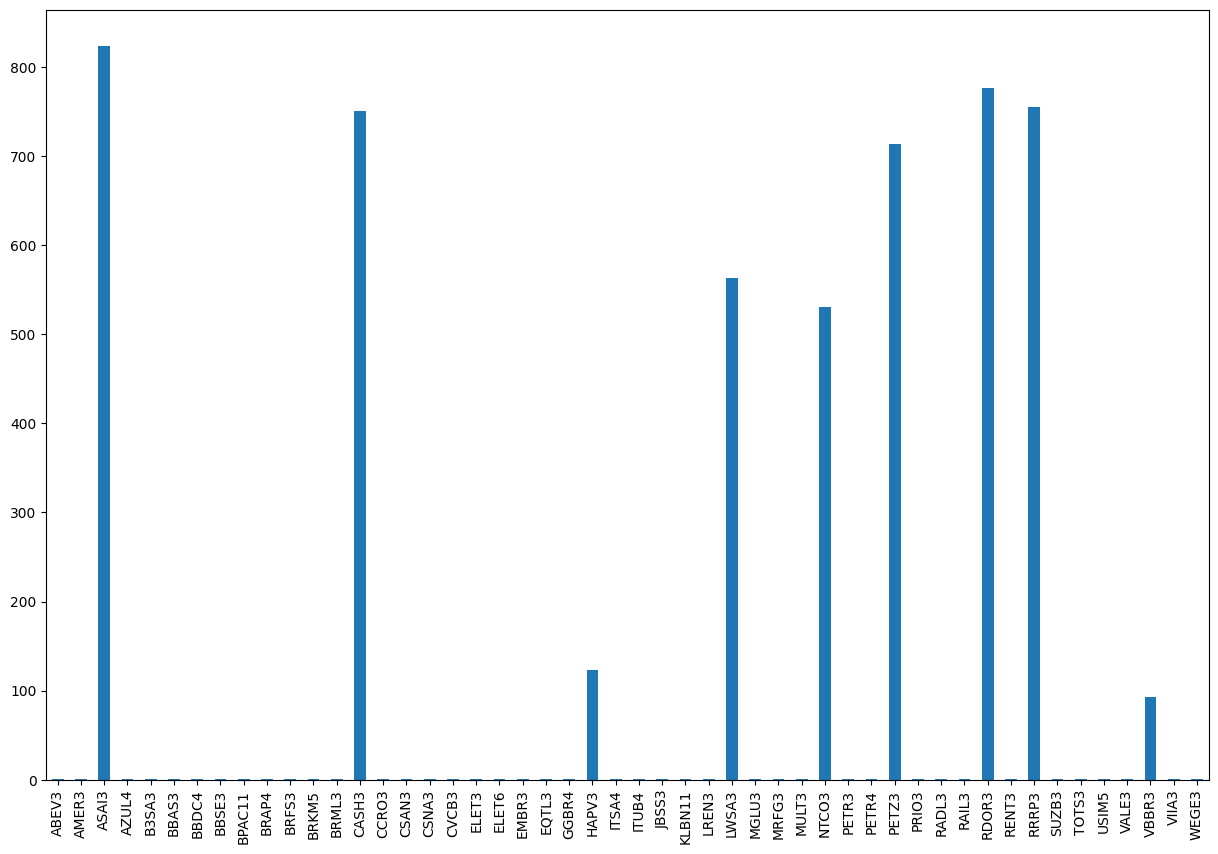

In [16]:
# Visualizando
plt.figure(figsize=(15, 10))
prices.isna().sum().plot(kind='bar')

<Figure size 2500x1000 with 0 Axes>

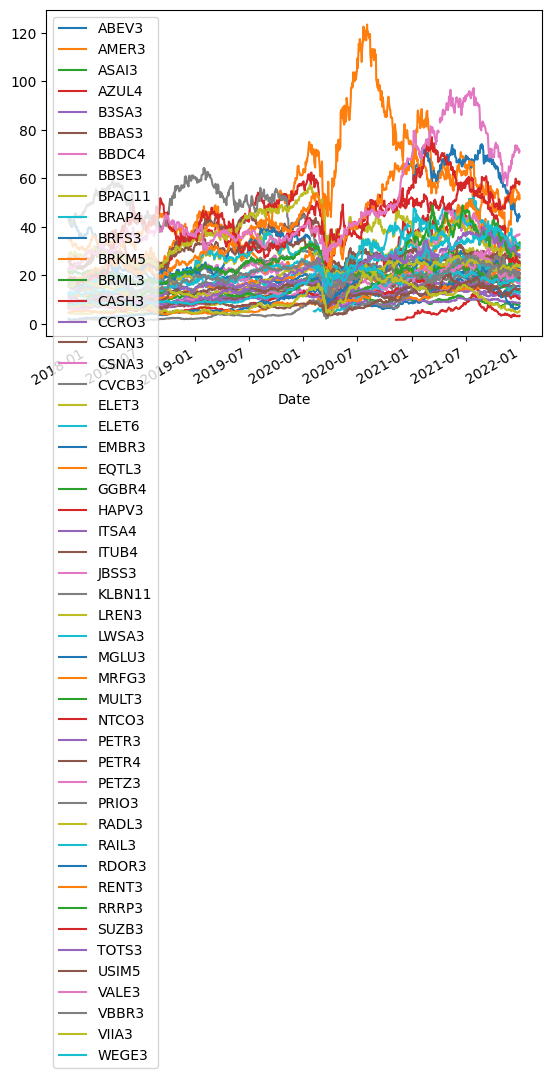

In [18]:
plt.figure(figsize=(25, 10))
prices.plot()
None

In [ ]:
def filling_na(df):
    return ['IBOV' if col == '^BVSP' else col.rstrip('SA') for col in df.columns]



In [52]:
# Preencher com a média dos vizinhos? Não entendi direito fazer só a média da coluna
prices.columns = prices.

ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got mean

- Q2. Em uma célula mostre os últimos 12 dias de preços, ordenados do mais recente para o mais antigo. Nas 2 células seguintes mostre os retornos diários para os mesmos dias, na primeira calculados usando diferença de logaritmos e na segunda a diferença percentual.Mostre a diferença das duas medidas.

In [61]:
# Last 12 days sorted from newest to oldest
last12 = prices.tail(15).sort_values(by='Date', ascending=False)
last12

,ABEV3.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,...,RDOR3.SA,RENT3.SA,RRRP3.SA,SUZB3.SA,TOTS3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,15.42,30.96,12.86,24.36,10.76,27.36,17.12,19.27,20.54,23.64,...,44.34,52.12,33.55,58.52,28.54,14.38,71.37,20.90,5.25,32.45
2021-12-29,15.45,30.41,12.74,23.86,10.70,27.46,17.20,19.20,20.31,23.17,...,43.86,51.23,33.48,57.47,27.79,14.04,70.72,20.60,5.02,32.21
2021-12-28,15.52,30.42,12.99,25.75,10.78,27.61,17.28,19.31,20.30,23.18,...,45.34,52.66,32.07,58.08,28.09,13.99,70.54,20.96,4.95,32.75
2021-12-27,15.53,31.27,13.53,25.67,10.93,27.77,17.34,19.27,21.04,23.32,...,44.23,54.13,31.77,58.74,28.57,14.27,72.28,20.81,4.86,32.64
2021-12-23,15.55,30.12,13.98,26.46,10.99,27.71,17.14,19.15,21.02,22.72,...,42.19,53.84,31.27,58.59,28.50,14.10,72.46,20.54,4.50,32.93
2021-12-22,15.39,30.02,14.05,26.80,11.11,27.81,17.09,19.05,21.33,22.55,...,42.28,54.71,31.48,58.05,29.03,14.14,73.17,20.76,4.50,33.13
2021-12-21,15.40,30.19,14.14,26.44,10.98,27.98,17.01,19.06,20.97,22.30,...,44.82,54.97,30.84,58.40,28.88,14.35,73.55,20.85,4.61,33.37
2021-12-20,15.42,30.48,13.99,24.51,11.33,27.90,17.08,18.93,21.18,21.13,...,44.70,55.07,30.30,58.30,28.93,13.92,71.67,21.02,4.74,33.46
2021-12-17,15.47,30.70,14.34,25.42,11.74,28.76,17.44,19.08,22.13,21.89,...,45.37,55.69,32.30,59.88,29.45,14.74,72.48,21.58,4.85,34.26


In [65]:
# Retorno Logarítmico
np.log(last12/ last12.shift(1))

# só colocar menos

,ABEV3.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,...,RDOR3.SA,RENT3.SA,RRRP3.SA,SUZB3.SA,TOTS3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-29,0.001944,-0.017925,-0.009375,-0.020739,-0.005592,0.003648,0.004662,-0.003639,-0.011261,-0.020082,...,-0.010884,-0.017223,-0.002089,-0.018106,-0.026630,-0.023928,-0.009149,-0.014458,-0.044798,-0.007423
2021-12-28,0.004521,0.000329,0.019433,0.076231,0.007449,0.005448,0.004640,0.005713,-0.000492,0.000431,...,0.033187,0.027531,-0.043027,0.010558,0.010737,-0.003568,-0.002548,0.017325,-0.014042,0.016626
2021-12-27,0.000644,0.027559,0.040730,-0.003112,0.013819,0.005778,0.003466,-0.002074,0.035805,0.006022,...,-0.024786,0.027532,-0.009399,0.011300,0.016944,0.019817,0.024368,-0.007182,-0.018349,-0.003364
2021-12-23,0.001287,-0.037470,0.032718,0.030311,0.005474,-0.002163,-0.011601,-0.006247,-0.000951,-0.026066,...,-0.047220,-0.005372,-0.015863,-0.002557,-0.002453,-0.011985,0.002487,-0.013059,-0.076961,0.008846
2021-12-22,-0.010343,-0.003326,0.004995,0.012768,0.010860,0.003602,-0.002921,-0.005236,0.014640,-0.007511,...,0.002131,0.016030,0.006693,-0.009259,0.018426,0.002833,0.009751,0.010654,0.000000,0.006055
2021-12-21,0.000650,0.005647,0.006385,-0.013524,-0.011770,0.006094,-0.004692,0.000525,-0.017022,-0.011148,...,0.058340,0.004741,-0.020540,0.006011,-0.005180,0.014742,0.005180,0.004326,0.024150,0.007218
2021-12-20,0.001298,0.009560,-0.010665,-0.075797,0.031379,-0.002863,0.004107,-0.006844,0.009964,-0.053893,...,-0.002681,0.001818,-0.017665,-0.001714,0.001730,-0.030423,-0.025893,0.008120,0.027809,0.002693
2021-12-17,0.003237,0.007192,0.024710,0.036455,0.035548,0.030359,0.020858,0.007893,0.043877,0.035336,...,0.014878,0.011195,0.063920,0.026740,0.017815,0.057238,0.011238,0.026293,0.022942,0.023628


In [62]:
# Retorno Percentual
last12.pct_change()

,ABEV3.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,...,RDOR3.SA,RENT3.SA,RRRP3.SA,SUZB3.SA,TOTS3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-29,0.001946,-0.017765,-0.009331,-0.020525,-0.005576,0.003655,0.004673,-0.003633,-0.011198,-0.019882,...,-0.010825,-0.017076,-0.002086,-0.017943,-0.026279,-0.023644,-0.009107,-0.014354,-0.043810,-0.007396
2021-12-28,0.004531,0.000329,0.019623,0.079212,0.007477,0.005462,0.004651,0.005729,-0.000492,0.000432,...,0.033744,0.027913,-0.042115,0.010614,0.010795,-0.003561,-0.002545,0.017476,-0.013944,0.016765
2021-12-27,0.000644,0.027942,0.041570,-0.003107,0.013915,0.005795,0.003472,-0.002071,0.036453,0.006040,...,-0.024482,0.027915,-0.009355,0.011364,0.017088,0.020014,0.024667,-0.007156,-0.018182,-0.003359
2021-12-23,0.001288,-0.036776,0.033259,0.030775,0.005489,-0.002161,-0.011534,-0.006227,-0.000951,-0.025729,...,-0.046123,-0.005357,-0.015738,-0.002554,-0.002450,-0.011913,0.002490,-0.012975,-0.074074,0.008885
2021-12-22,-0.010289,-0.003320,0.005007,0.012850,0.010919,0.003609,-0.002917,-0.005222,0.014748,-0.007482,...,0.002133,0.016159,0.006716,-0.009217,0.018596,0.002837,0.009799,0.010711,0.000000,0.006073
2021-12-21,0.000650,0.005663,0.006406,-0.013433,-0.011701,0.006113,-0.004681,0.000525,-0.016878,-0.011086,...,0.060076,0.004752,-0.020330,0.006029,-0.005167,0.014851,0.005193,0.004335,0.024444,0.007244
2021-12-20,0.001299,0.009606,-0.010608,-0.072995,0.031876,-0.002859,0.004115,-0.006821,0.010014,-0.052466,...,-0.002677,0.001819,-0.017510,-0.001712,0.001731,-0.029965,-0.025561,0.008153,0.028200,0.002697
2021-12-17,0.003243,0.007218,0.025018,0.037128,0.036187,0.030824,0.021077,0.007924,0.044854,0.035968,...,0.014989,0.011258,0.066007,0.027101,0.017974,0.058908,0.011302,0.026641,0.023207,0.023909


In [ ]:
exemplo tabular e um exemplo gráfico com1 ativo

In [77]:
# Retorno Percentual Acumulado
retorno_simples = (last12.pct_change() + 1).cumprod()

# Pegando o último valor da coluna
retorno_simples.iloc[-2:-1]

# como aqui pega do mais recente para o mais antigo então está errado, deveria pegar só o primeiro e último valor?

,ABEV3.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,...,RDOR3.SA,RENT3.SA,RRRP3.SA,SUZB3.SA,TOTS3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-10,0.99546,0.902455,1.122862,1.062397,1.097584,1.120249,1.039136,1.01972,1.077897,0.883249,...,1.117952,1.067345,0.907303,0.973172,1.123336,0.99096,0.970436,1.061244,1.04381,1.084438


Q3.Escolha 2ações das 50 estudadas, que tenham sido negociadas desde pelo menos 01/11/2017, deixe claro quais você escolheu. Apresente graficamente o histórico de preços, de variação e a distribuição dos retornos diários delas. Cada ação deve ter seus gráficos apresentados como output de uma única célula.

In [ ]:
# escolher automaticamente as duas ações com maior e pior retorno e que estão desde o começo do período

Q4.Crie dataframes com os retornos mensais e trimestrais das 2 ações e a variação do IBOVESPA. A partir desses mostre a média, mediana, variança, 1º e 3º quartil para o retorno trimestrais e mensais das ações.

In [ ]:
#resample

Q5.Utilizando os dados dessas mesmas 2 ações implemente uma estratégia de trade para cada uma delas usando Índice de Força Relativa, com janela de 21 dias úteis e pontos de entrada de 75 e 25. Mostre o resultado dasestratégiaspara o período de 01/01/2018 a 31/12/2021.

In [ ]:
#rsi


Q6.Apresente  as  métricas e  gráficos  que  achar  relevantes  sobre  as  estratégias  da  Q5,  comparando  as duas ações e avaliando cada estratégia em comparação ao desempenho do IBOVESPA.

Bonus. Comente e, se possível, implementecomo seria possível melhorar as estratégias testadas.Lembre-se,avaliaremos também a clareza e compreensibilidadedo código, utilize comentários a vontade para facilitar o entendimento. Para poder avaliar o código precisamos ser capazes de executá-lo, garantaque todas as dependências são facilmente encontradas e disponíveis.